In [6]:
#necessary package import
#Numpy
import numpy as np
from numpy.linalg import multi_dot
from math import factorial, tanh
#Matplotlib
import matplotlib.pyplot as plt
#Scipy
from scipy.linalg import block_diag
#Thewalrus
from thewalrus import perm
#Strawberryfields
import strawberryfields as sf
from strawberryfields.ops import *
#import mplhep as hep
#Qutip
from qutip import *

In [8]:
#Setting Variables
#Rotation gates
R1 = np.pi/4
R2 = np.pi/4
R3 = np.pi/4
R4 = np.pi/4
R5 = np.pi/4
R6 = np.pi/4
R7 = np.pi/4
R8 = np.pi/4
R9 = np.pi/4
R10 = np.pi/4
R11 = np.pi/4
R12 = np.pi/4
R13 = np.pi/4
R14 = np.pi/4
R15 = np.pi/4
R16 = np.pi/4
R17 = np.pi/4
R18 = np.pi/4
R19 = np.pi/4
R20 = np.pi/4

#Beamsplitters
BT = np.pi/4;  BP = np.pi/2

In [9]:
#Rotation gate calculation
Uphase = np.diag([np.exp(R1*1j),np.exp(R2*1j),np.exp(R3*1j),np.exp(R4*1j),np.exp(R5*1j),
                  np.exp(R6*1j),np.exp(R7*1j),np.exp(R8*1j),np.exp(R9*1j),np.exp(R10*1j),
                  np.exp(R11*1j),np.exp(R12*1j),np.exp(R13*1j),np.exp(R14*1j),np.exp(R15*1j),
                  np.exp(R16*1j),np.exp(R17*1j),np.exp(R18*1j),np.exp(R19*1j),np.exp(R20*1j)])

In [20]:
#Beamsplitter calculation
#Put variables
BSargs = [(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),
          (BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),
          (BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),
          (BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),
          (BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP),(BT, BP)]

t_r_amplitudes = [(np.cos(q), np.exp(p*1j)*np.sin(q)) for q,p in BSargs]

BSunitaries = [np.array([[t, -np.conj(r)], [r, t]]) for t,r in t_r_amplitudes]

UBS1 = block_diag(*BSunitaries[0:10])
UBS2 = block_diag([[1]], BSunitaries[10], BSunitaries[11], BSunitaries[12], BSunitaries[13], BSunitaries[14], BSunitaries[15], BSunitaries[16], BSunitaries[17], BSunitaries[18], [[1]])
UBS3 = block_diag(*BSunitaries[19:29])
UBS4 = block_diag([[1]], BSunitaries[29], BSunitaries[30], BSunitaries[31], BSunitaries[32], BSunitaries[33], BSunitaries[34], BSunitaries[35], BSunitaries[36], BSunitaries[37], [[1]])
UBS5 = block_diag(*BSunitaries[38:48])

In [29]:
U = multi_dot([UBS5, UBS4, UBS3, UBS2, UBS1, Uphase])
#print(np.round(U,4))

In [22]:
n = 2
# Calculating the probability for each state in measure_states
measure_states = [[q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, q11, q12, q13, q14, q15, q16, q17, q18, q19, q20] 
                  for q20 in range(n+1) for q19 in range(n+1) for q18 in range(n+1) for q17 in range(n+1) for q16 in range(n+1) 
                  for q15 in range(n+1) for q14 in range(n+1) for q13 in range(n+1) for q12 in range(n+1) for q11 in range(n+1)
                  for q10 in range(n+1) for q9 in range(n+1) for q8 in range(n+1) for q7 in range(n+1) for q6 in range(n+1)
                  for q5 in range(n+1) for q4 in range(n+1) for q3 in range(n+1) for q2 in range(n+1) for q1 in range(n+1)
                  if q1 + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9 + q10 + q11 + q12 + q13 + q14 + q15 + q16 + q17 + q18 + q19 + q20 == 2]

In [30]:
input = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

def unitary_mapping(output):
    # The two lines below are the extracted row and column indices.
    list_rows = sum([[i] * output[i] for i in range(len(output))],[])
    list_columns = sum([[i] * input[i] for i in range(len(input))],[])
    Umap = U[:,list_columns][list_rows,:]
    return Umap

def probs_theory(output):
    perm_squared = np.abs(perm(unitary_mapping(output), method="ryser"))**2
    denominator = np.prod([factorial(inp) for inp in input]) * np.prod([factorial(out) for out in output])
    return perm_squared / denominator

In [31]:
#Comparing Theory and Simulation
# Initialize the total probability
total_probability_T = 0  

# measure_states의 각 상태에 대해 확률을 출력
for i, state in enumerate(measure_states):
    # 각 상태의 확률을 출력
    # *state는 state 리스트의 요소들을 개별 인자로 전달합니다.
    print(f"Probability of state(Theory)     {state}: {probs_theory(state)*100}%")
    total_probability_T += probs_theory(state)
    
# Print the total probability
print(f"Total probability(Theory):     {total_probability_T*100}%")

Probability of state(Theory)     [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%
Probability of state(Theory)     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%
Probability of state(Theory)     [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%
Probability of state(Theory)     [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%
Probability of state(Theory)     [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%
Probability of state(Theory)     [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%
Probability of state(Theory)     [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%
Probability of state(Theory)     [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%
Probability of state(Theory)     [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%
Probability of state(Theory)     [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]: 0.0%


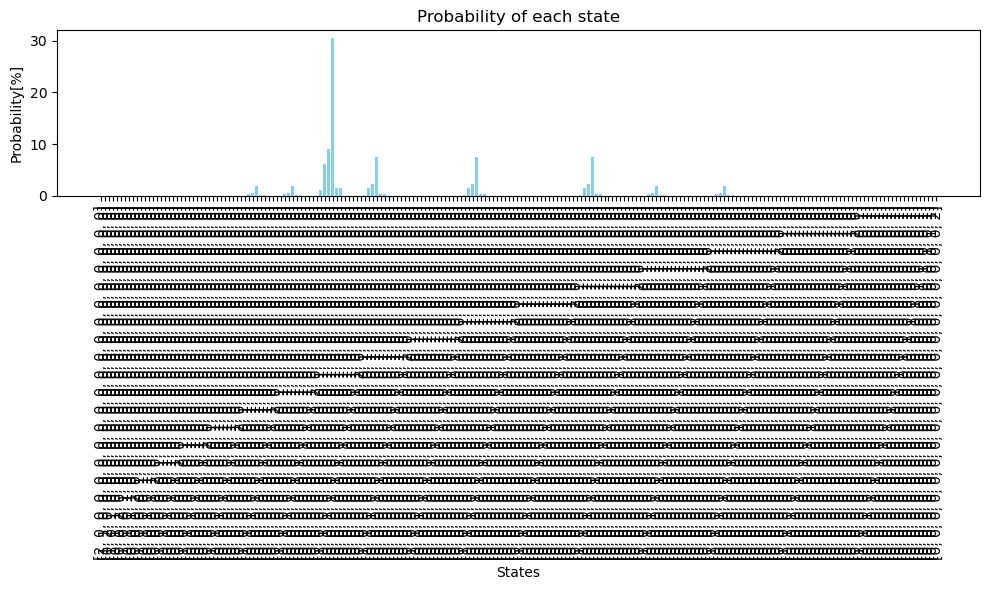

In [28]:
#Probaibility
state_probs = [probs_theory(state)*100 for state in measure_states]

# Creating labels for the states
state_labels = [str(state) for state in measure_states]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(state_labels, state_probs, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Probability[%]")
#plt.yscale('log')
plt.title("Probability of each state")
plt.tight_layout()

#이미지를 경로에 저장. 확장자는 .pdf, .png, .jpeg등 가능
#plt.savefig('/Users/jaewonlee/Lab/PQC/BS_Q_4(log).png', transparent = True)

# Showing the plot
plt.show()